In [1]:
# Conformal Prediction Example1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import openpyxl
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_curve, auc

In [3]:
# Read input data

In [22]:
data =  pd.read_csv('problem6.csv')
data.head()
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [5]:
# 驗證是否讀取正確

In [6]:
data.describe()

,Yield,Class
count,1006.000000,1006.000000
mean,2.432048,0.614314
std,1.896508,0.486999
min,0.000000,0.000000
25%,0.870000,0.000000
50%,2.365000,1.000000
75%,3.740000,1.000000
max,13.330000,1.000000


In [7]:
# 資料筆數

In [8]:
totalsample=data.shape[0]
print(totalsample)

1006


In [9]:
# 資料分割

In [30]:
X = data.iloc[:,0:1].values
print(type(X))
Y = data['Class'].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25,random_state = 0)
X_traino=X_train
X_testo=X_test
Y_traino=Y_train
Y_testo=Y_test

<class 'numpy.ndarray'>


In [11]:
# 資料正規化

In [12]:
stdscaler = StandardScaler()
X_train = stdscaler.fit_transform(X_train)
X_test = stdscaler.transform(X_test)

In [13]:
#建立Naive Bayes model

In [14]:
clf = GaussianNB()
clf.fit(X_train,Y_train)

GaussianNB()

In [15]:
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[ 93   3]
 [  0 156]]


In [21]:
y_predproba=clf.predict_proba(X_test)
y_predprobatrain=clf.predict_proba(X_train)

<class 'numpy.ndarray'>


In [17]:
print('Accuracy score:',accuracy_score(Y_test,y_pred))

Accuracy score: 0.9880952380952381


[       inf 1.         1.         1.         1.         1.
 0.99999999 0.99999999 0.99999998 0.99999997 0.99999854 0.99999812
 0.99999637 0.99999573 0.9999357  0.99991983 0.99974817 0.99971052
 0.99946365 0.99914365 0.99902301 0.99835881 0.99788374 0.99042693
 0.98494923 0.97908902 0.97671537 0.97543928 0.86979161 0.84093223
 0.73840987 0.68594787 0.66761284 0.63950361 0.5915457  0.3868344
 0.37023474 0.24433619 0.2330205  0.15979572 0.14910089 0.13610813
 0.12724199 0.09620246 0.08692136 0.08521356 0.08193574 0.06450461
 0.0623318  0.04069026 0.0315839 ] [0.         0.09615385 0.10897436 0.12820513 0.27564103 0.30128205
 0.33974359 0.3525641  0.35897436 0.37820513 0.45512821 0.46794872
 0.47435897 0.49358974 0.54487179 0.55769231 0.59615385 0.60897436
 0.62179487 0.6474359  0.66025641 0.69871795 0.71153846 0.80128205
 0.82051282 0.83333333 0.83974359 0.8525641  0.94230769 0.95512821
 0.98076923 0.99358974 1.         1.         1.         1.
 1.         1.         1.         1.        

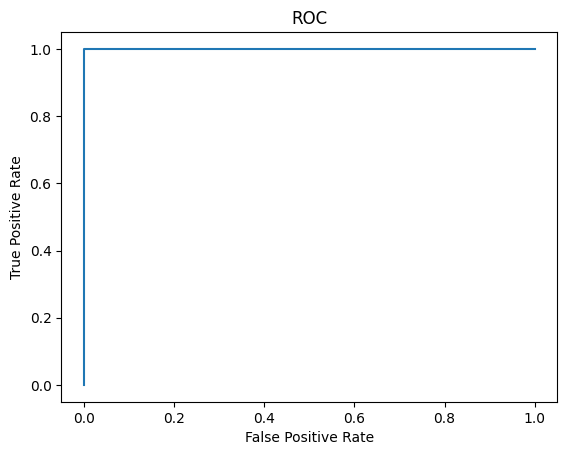

In [18]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predproba[:,1])
print(thresholds,true_positive_rate,false_positive_rate)
df = pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })
df.to_csv("roc2.csv")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)
print(accuracy_score(Y_test,y_pred))
print(precision_score(Y_test,y_pred))
print()
print(recall_score(Y_test,y_pred))
print()
print(f1_score(Y_test,y_pred))
print()
from sklearn.metrics import roc_curve, auc
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

In [28]:
df1=data[data.Class==0]
class1evidence=df1.shape[0]/totalsample
print(class1evidence)
df2=data[data.Class==1]
class2evidence=df2.shape[0]/totalsample
print(class2evidence)

0.3856858846918489
0.614314115308151


In [50]:
traintotal=X_traino.shape[0]
yp=[]
xp=[]
zp=[]
mp=[]
for i in range(traintotal):
    if(Y_traino[i]==nclass):
        yp.append(y_predprobatrain[i,0])
        xp.append(X_traino[i,:])

testtotal=X_testo.shape[0]

for i in range(testtotal):
    if(Y_testo[i]==nclass):
        yp.append(y_predproba[i,0])
        xp.append(X_testo[i,:])

df1=data[data.Class==0]

for k in range(df1.shape[0]):
    zp.append(yp[k]*class1evidence)
    mp.append(0)

for i in range(df1.shape[0]):
    zz=0
    for j in range(df1.shape[0]):
        if(zp[i]>=zp[j]):
            zz=zz+1
    mp[i]=zz/df1.shape[0]

zsup=max(zp)
print(mp)

[1.0, 1.0, 0.2963917525773196, 0.3634020618556701, 1.0, 1.0, 0.2860824742268041, 1.0, 1.0, 0.18298969072164947, 0.3582474226804124, 0.04896907216494845, 0.40463917525773196, 1.0, 1.0, 1.0, 1.0, 0.08247422680412371, 1.0, 0.061855670103092786, 0.18041237113402062, 0.3556701030927835, 1.0, 1.0, 0.40463917525773196, 0.13917525773195877, 1.0, 1.0, 1.0, 0.04639175257731959, 0.09020618556701031, 1.0, 0.42783505154639173, 1.0, 1.0, 1.0, 1.0, 1.0, 0.13917525773195877, 1.0, 1.0, 1.0, 0.4536082474226804, 1.0, 1.0, 0.06701030927835051, 0.25773195876288657, 0.24484536082474226, 0.03865979381443299, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.10309278350515463, 1.0, 1.0, 1.0, 1.0, 0.3865979381443299, 0.13917525773195877, 1.0, 1.0, 0.25773195876288657, 1.0, 0.3118556701030928, 1.0, 0.22422680412371135, 0.41494845360824745, 0.04381443298969072, 0.47680412371134023, 0.27319587628865977, 1.0, 0.17010309278350516, 1.0, 0.3711340206185567, 1.0, 1.0, 0.028350515463917526, 0.16237113402061856, 1.0, 1.0, 1.0, 0.23453608